# Hello compare generalization with different model sizes

In [1]:
# Prerequisites
import sys
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.0.2
Pandas Version:  2.2.3


### Load Data, IMDB movie reviews

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

### Build and train base ANN model

In [3]:
model_base = Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_base.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_base = model_base.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6785 - loss: 0.6071 - val_accuracy: 0.8469 - val_loss: 0.4114
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8928 - loss: 0.3373 - val_accuracy: 0.8570 - val_loss: 0.3514
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9197 - loss: 0.2496 - val_accuracy: 0.8920 - val_loss: 0.2808
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9415 - loss: 0.1896 - val_accuracy: 0.8927 - val_loss: 0.2743
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9521 - loss: 0.1534 - val_accuracy: 0.8904 - val_loss: 0.2808
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9645 - loss: 0.1238 - val_accuracy: 0.8873 - val_loss: 0.2893
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9721 - loss: 0.1033 - val_accuracy: 0.8877 - val_loss: 0.3009
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9779 - loss: 0.0860 - val_accuracy: 0.8782 - val_loss

### Build and train smaller model

In [4]:
model_small = Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_small.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_small = model_small.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6566 - loss: 0.6465 - val_accuracy: 0.8305 - val_loss: 0.5086
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8636 - loss: 0.4668 - val_accuracy: 0.8508 - val_loss: 0.4287
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8993 - loss: 0.3598 - val_accuracy: 0.8734 - val_loss: 0.3534
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9147 - loss: 0.2956 - val_accuracy: 0.8869 - val_loss: 0.3161
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9256 - loss: 0.2471 - val_accuracy: 0.8846 - val_loss: 0.3049
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9370 - loss: 0.2133 - val_accuracy: 0.8907 - val_loss: 0.2853
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9439 - loss: 0.1871 - val_accuracy: 0.8910 - val_loss: 0.2771
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9458 - loss: 0.1706 - val_accuracy: 0.8896 - val_loss

### Build and train oversized large model

In [8]:
model_xl = Sequential([
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(1, activation="sigmoid")
])

model_xl.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history_xl = model_xl.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.6317 - loss: 0.6440 - val_accuracy: 0.8678 - val_loss: 0.3343
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8627 - loss: 0.3411 - val_accuracy: 0.8457 - val_loss: 0.3571
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8980 - loss: 0.2491 - val_accuracy: 0.8883 - val_loss: 0.2696
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9374 - loss: 0.1715 - val_accuracy: 0.8860 - val_loss: 0.2697
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9564 - loss: 0.1308 - val_accuracy: 0.8852 - val_loss: 0.3089
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9560 - loss: 0.1179 - val_accuracy: 0.8824 - val_loss: 0.3201
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9779 - loss: 0.0732 - val_accuracy: 0.8827 - val_loss: 0.3546
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9856 - loss: 0.0508 - val_accuracy: 0.8819 - v

### Plot Comparison of Validation losses vs. model size

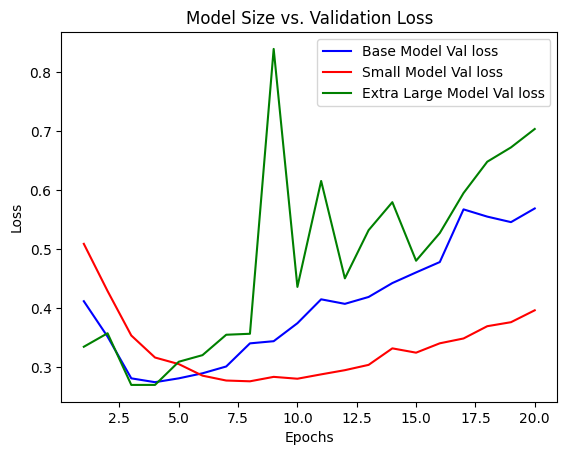

In [10]:
base_dict = history_base.history
small_dict = history_small.history
xl_dict = history_xl.history
loss_values = base_dict["loss"]
base_model_loss = base_dict["val_loss"]
small_model_loss = small_dict["val_loss"]
xl_model_loss = xl_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, base_model_loss, "b", label="Base Model Val loss")
plt.plot(epochs, small_model_loss, "r", label="Small Model Val loss")
plt.plot(epochs, xl_model_loss, "g", label="Extra Large Model Val loss")
plt.title("Model Size vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The smaller model starts overfitting later than the base model and its performance degrades more slowly once it starts overfitting.

The Extra large model starts overfitting right away and its validation loss curve is choppy with high variance.